# 作業 2：從傳統到現代 - 文本處理方法實作與比較

**課程助教：** 陳戎新  
**電子郵件：** s711383106@gm.ntpu.edu.tw

---

### 學習目標
在生成式 AI 蓬勃發展的今天，許多人直接使用 ChatGPT 等工具，卻不了解其背後的基礎原理。本作業將帶您：

1. 親手實作傳統 NLP 方法，理解文本處理的數學基礎。
2. 使用現代 AI 完成相同任務，體驗技術進步帶來的便利。
3. 深入比較兩種方法，培養選擇適當工具的判斷力。
4. 了解技術演進脈絡，建立扎實的 NLP 知識體系。

### Learning Objectives

In today's booming field of generative AI, many people directly use tools like ChatGPT without understanding the underlying principles. This assignment will guide you to:

1. Implement traditional NLP methods hands-on and understand the mathematical foundations of text processing.

2. Complete the same task using modern AI and experience the convenience brought by technological advancements.

3. Compare the two methods in depth and develop the ability to choose appropriate tools.

4. Understand the evolution of technology and build a solid NLP knowledge base.

## 1. 環境設定與套件安裝

首先，執行以下指令安裝本次作業所需的所有套件。（可依自己環境調整）

## 1. Environment Setup and Package Installation

First, execute the following commands to install all the packages required for this task. (Adjustments can be made according to your own environment.)

In [5]:
!pip install -q numpy pandas matplotlib seaborn scikit-learn jieba stopwordsiso tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.6 MB/s eta 0:00:00


## Part A: 傳統方法實作 (50分) ## Part A: Traditional Method Practice (50 points)

### A-1: TF-IDF 文本相似度計算 (20分)

任務說明：實作 TF-IDF 算法，並利用它來計算文本間的相似度。您需要：
1. 手動計算 TF-IDF (10分)
2. 使用 scikit-learn 實作 (5分)
3. 視覺化成果（計入分數）

### A-1: ​​TF-IDF Text Similarity Calculation (20 points)

Task Description: Implement the TF-IDF algorithm and use it to calculate the similarity between texts. You will need to:

1. Manually calculate TF-IDF (10 points)

2. Implement using scikit-learn (5 points)

3. Visualize the results (included in the score)

In [6]:
import os, re, math, json, random, itertools, collections
import jieba
from stopwordsiso import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np
import pandas as pd
from collections import Counter
import math

# 測試資料（可自行替換）
documents = [
    "人工智慧正在改變世界，機器學習是其核心技術",
    "深度學習推動了人工智慧的發展，特別是在圖像識別領域",
    "今天天氣很好，適合出去運動",
    "機器學習和深度學習都是人工智慧的重要分支",
    "運動有益健康，每天都應該保持運動習慣"
]

# 中文斷詞
tokenized_documents = [list(jieba.cut(doc)) for doc in documents]
print("斷詞結果:")
for i, doc in enumerate(tokenized_documents, 1):
    print(f"Document {i}: {doc}")

/usr/local/lib/python3.12/dist-packages/jieba/__init__.py:44: SyntaxWarning: invalid escape sequence '\.'
  re_han_default = re.compile("([\u4E00-\u9FD5a-zA-Z0-9+#&\._%\-]+)", re.U)
/usr/local/lib/python3.12/dist-packages/jieba/__init__.py:46: SyntaxWarning: invalid escape sequence '\s'
  re_skip_default = re.compile("(\r\n|\s)", re.U)
/usr/local/lib/python3.12/dist-packages/jieba/finalseg/__init__.py:78: SyntaxWarning: invalid escape sequence '\.'
  re_skip = re.compile("([a-zA-Z0-9]+(?:\.\d+)?%?)")
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 2.037 seconds.
DEBUG:jieba:Loading model cost 2.037 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


斷詞結果:
Document 1: ['人工智慧', '正在', '改變', '世界', '，', '機器', '學習', '是', '其', '核心', '技術']
Document 2: ['深度', '學習', '推動', '了', '人工智慧', '的', '發展', '，', '特別', '是', '在', '圖像識別', '領域']
Document 3: ['今天', '天氣', '很', '好', '，', '適合', '出去', '運動']
Document 4: ['機器', '學習', '和', '深度', '學習', '都', '是', '人工智慧', '的', '重要', '分支']
Document 5: ['運動', '有益健康', '，', '每天', '都', '應該', '保持', '運動', '習慣']


#### 1. 手動實作 TF-IDF

In [7]:
def calculate_tf(word_dict, total_words):
    """計算詞頻 (Term Frequency)
    Args:
        word_dict: 詞彙計數字典 (e.g., {'人工智慧': 2, '世界': 1})
        total_words: 該文件的總詞數
    Returns:
        tf_dict: TF 值字典
    """
    # TODO: 實作 TF 計算
    # 提示：TF = (該詞在文件中出現的次數) / (文件總詞數)
    return {word: cnt / total_words for word, cnt in word_dict.items()}


def calculate_idf(documents, word):
    """計算逆文件頻率 (Inverse Document Frequency)
    Args:
        documents: 文件列表 (斷詞後的版本)
        word: 目標詞彙
    Returns:
        idf: IDF 值
    """
    # TODO: 實作 IDF 計算
    # 提示：IDF = log((總文件數) / (包含該詞的文件數 + 1))，+1 為避免分母為 0
    N = len(documents)
    # 文件頻率：含有該詞的文件數
    df = sum(1 for doc in documents if word in set(doc))
    # 依提示：加 1 平滑避免除以 0
    return math.log(N / (df + 1))


def calculate_tfidf(tokenized_documents):
    """計算 TF-IDF 主函數
    回傳：pandas.DataFrame，列為文件，欄為詞彙
    """
    # TODO:
    # 1) 遍歷所有文件，計算每個文件的 TF
    # 2) 建立詞彙庫 (vocabulary)
    # 3) 對詞彙庫中的每個詞，計算其 IDF
    # 4) 結合 TF 和 IDF 計算每個文件中每個詞的 TF-IDF 值
    # 5) 回傳 TF-IDF 矩陣 (pandas DataFrame)

    # 1) Calculate TF for each document
    tf_scores = []
    for doc in tokenized_documents:
        word_counts = Counter(doc)
        tf_scores.append(calculate_tf(word_counts, len(doc)))

    # 2) Build vocabulary
    vocabulary = set(word for doc in tokenized_documents for word in doc)

    # 3) Calculate IDF for each word in vocabulary
    idf_scores = {word: calculate_idf(tokenized_documents, word) for word in vocabulary}

    # 4) Calculate TF-IDF
    tfidf_matrix = {}
    for i, doc_tf in enumerate(tf_scores):
        tfidf_doc = {word: tf * idf_scores[word] for word, tf in doc_tf.items()}
        tfidf_matrix[f"Document {i+1}"] = tfidf_doc

    # 5) Return TF-IDF matrix as DataFrame
    return pd.DataFrame(tfidf_matrix).fillna(0).T


# 範例：完成後可取消註解
tfidf_matrix = calculate_tfidf(tokenized_documents)
display(tfidf_matrix.head())

,人工智慧,正在,改變,世界,，,機器,學習,是,其,核心,...,運動,和,都,重要,分支,有益健康,每天,應該,保持,習慣
Document 1,0.020286,0.083299,0.083299,0.083299,0.0,0.046439,0.020286,0.020286,0.083299,0.083299,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
Document 2,0.017165,0.000000,0.000000,0.000000,0.0,0.000000,0.017165,0.017165,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
Document 3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.063853,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
Document 4,0.020286,0.000000,0.000000,0.000000,0.0,0.046439,0.040572,0.020286,0.000000,0.000000,...,0.000000,0.083299,0.046439,0.083299,0.083299,0.00000,0.00000,0.00000,0.00000,0.00000
Document 5,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.113517,0.000000,0.056758,0.000000,0.000000,0.10181,0.10181,0.10181,0.10181,0.10181


#### 2. 使用 scikit-learn 實作

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TfidfVectorizer 需要以空格分隔的字串，所以我們先把斷詞結果接起來
processed_docs = [' '.join(doc) for doc in tokenized_documents]

# TODO: 使用 TfidfVectorizer 和 cosine_similarity 計算相似度矩陣
# 1) 初始化 TfidfVectorizer
# 2) fit_transform 文本資料
# 3) 使用 cosine_similarity 計算向量相似度
# 1) 初始化 TfidfVectorizer
#    我們已經把中文詞用空格連起來了，所以用空白切詞即可：
#    token_pattern 設為 "[^ ]+" 表示以空白分詞（避免預設 \w 對中文不友善）
vectorizer = TfidfVectorizer(token_pattern=r"[^ ]+", lowercase=False)

# 2) 擬合並轉換成 TF-IDF 向量
X = vectorizer.fit_transform(processed_docs)   # shape: (num_docs, num_terms)

# 3) 計算 cosine similarity 矩陣
sim_matrix = cosine_similarity(X)              # shape: (num_docs, num_docs)

#（可選）整理成 DataFrame 方便看
sim_df = pd.DataFrame(sim_matrix,
                      index=[f"Doc{i+1}" for i in range(len(processed_docs))],
                      columns=[f"Doc{i+1}" for i in range(len(processed_docs))])
sim_df

,Doc1,Doc2,Doc3,Doc4,Doc5
Doc1,1.000000,0.182701,0.041701,0.294422,0.037598
Doc2,0.182701,1.000000,0.038090,0.340526,0.034343
Doc3,0.041701,0.038090,1.000000,0.000000,0.209510
Doc4,0.294422,0.340526,0.000000,1.000000,0.077194
Doc5,0.037598,0.034343,0.209510,0.077194,1.000000


#### 3. 視覺化（熱圖） 3. Visualization (heatmap)

No specific Chinese font found, falling back to default sans-serif.


/tmp/ipython-input-468390214.py:57: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-468390214.py:57: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-468390214.py:57: UserWarning: Glyph 32232 (\N{CJK UNIFIED IDEOGRAPH-7DE8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-468390214.py:57: UserWarning: Glyph 34399 (\N{CJK UNIFIED IDEOGRAPH-865F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-468390214.py:57: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-468390214.py:57: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-468390214.py:57: UserWarning: Glyph 20284 (\N{CJK UNIFIED IDEOGRAPH-4F3C}) missing from

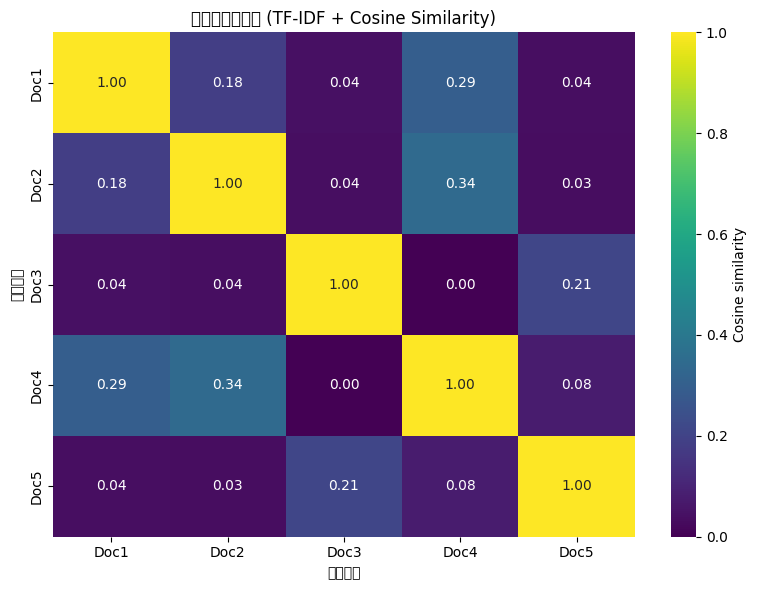

Saved to results/tfidf_similarity_matrix.png


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm

os.makedirs('results', exist_ok=True)

# If you followed the previous cell, you should already have `sim_matrix`.
# For safety, rebuild from X if needed:
try:
    similarity_matrix = sim_matrix
except NameError:
    from sklearn.metrics.pairwise import cosine_similarity
    similarity_matrix = cosine_similarity(X)

# Labels for axes
labels = [f"Doc{i+1}" for i in range(len(similarity_matrix))]

# Find a Chinese font that is available
# List common Chinese font names, including the one installed by apt-get
# Note: Font names found by fontManager might differ slightly.
chinese_fonts = ['Noto Sans CJK TC', 'Microsoft JhengHei', 'PingFang TC', 'Arial Unicode MS', 'WenQuanYi Zen Hei', 'SimHei']
available_chinese_font = None

# No explicit cache rebuilding attempted here as it caused errors in this environment.
# Relying on Matplotlib's automatic detection or a runtime restart after installation.


for font in chinese_fonts:
    if font in [f.name for f in fm.fontManager.ttflist]:
        available_chinese_font = font
        break

# Set font if an available Chinese font is found, otherwise fallback
if available_chinese_font:
    plt.rcParams['font.sans-serif'] = [available_chinese_font] + plt.rcParams['font.sans-serif'].copy()
    print(f"Using available Chinese font: {available_chinese_font}")
else:
    # Fallback to default sans-serif if no specific Chinese font is found
    print("No specific Chinese font found, falling back to default sans-serif.")

plt.rcParams['axes.unicode_minus'] = False


plt.figure(figsize=(8, 6))
sns.heatmap(
    similarity_matrix,
    annot=True, fmt=".2f",
    cmap='viridis',
    vmin=0, vmax=1,
    xticklabels=labels, yticklabels=labels,
    cbar_kws={"label": "Cosine similarity"}
)
plt.title('文本相似度矩陣 (TF-IDF + Cosine Similarity)')
plt.xlabel('文件編號')
plt.ylabel('文件編號')
plt.tight_layout()
plt.savefig('results/tfidf_similarity_matrix.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved to results/tfidf_similarity_matrix.png")

### A-2: 基於規則的文本分類 (15分)
任務說明：建立規則式分類器，不使用機器學習，純粹基於關鍵詞和規則。
1. 情感分類器 (8分)
2. 主題分類器 (7分)

### A-2: Rule-Based Text Classification (15 points)
Task Description: Build a rule-based classifier, without using machine learning, purely based on keywords and rules.

1. Sentiment Classifier (8 points)

2. Topic Classifier (7 points)


below text
# Test Data

test_texts = [

"The beef noodles at this restaurant are so delicious! The broth is rich and the noodles are springy. I'll definitely come again!"

"The latest AI technology breakthroughs are amazing; deep learning models are performing better and better."

"This movie has a hollow plot and terrible acting; it's a complete waste of time."

"I jog 5 kilometers every day, combined with appropriate weight training, and my physical fitness has improved a lot."

]

In [10]:
# 測試資料
test_texts = [
    "這家餐廳的牛肉麵真的太好吃了，湯頭濃郁，麵條Q彈，下次一定再來！",
    "最新的AI技術突破讓人驚豔，深度學習模型的表現越來越好",
    "這部電影劇情空洞，演技糟糕，完全是浪費時間",
    "每天慢跑5公里，配合適當的重訓，體能進步很多"
]

#### 1. 情感分類器

In [11]:
class RuleBasedSentimentClassifier:
    def __init__(self):
        # 建立正負面詞彙庫（可自行擴充）
        self.positive_words = ['好', '棒', '優秀', '喜歡', '推薦', '滿意', '開心', '值得', '精彩', '完美', '好吃', '濃郁', 'Q彈']
        self.negative_words = ['差', '糟', '失望', '討厭', '不推薦', '浪費', '無聊', '爛', '糟糕', '差勁', '空洞']
        self.negation_words = ['不', '沒', '無', '非', '別']

    def classify(self, text):
        """
        分類邏輯（請自行實作）：
        1) 計算正負詞數量
        2) 處理否定詞（否定 + 正面 → 轉負；否定 + 負面 → 轉正）
        3) （可選）程度副詞加權
        回傳：'正面' / '負面' / '中性'
        """
        # TODO: 實作情感分類邏輯
        tokens = list(jieba.cut(text))
        positive_score = 0
        negative_score = 0
        is_negated = False

        for token in tokens:
            if token in self.negation_words:
                is_negated = True
            elif token in self.positive_words:
                if is_negated:
                    negative_score += 1
                else:
                    positive_score += 1
                is_negated = False # Reset negation after encountering a sentiment word
            elif token in self.negative_words:
                if is_negated:
                    positive_score += 1 # Negating a negative word can make it positive
                else:
                    negative_score += 1
                is_negated = False # Reset negation after encountering a sentiment word
            else:
                is_negated = False # Reset negation if the word is not a sentiment word

        if positive_score > negative_score:
            return '正面'
        elif negative_score > positive_score:
            return '負面'
        else:
            return '中性'

# 範例：完成後可取消註解
# sentiment_classifier = RuleBasedSentimentClassifier()
# for text in test_texts:
# #     sentiment = sentiment_classifier.classify(text)
# #     print(f'文本: "{text[:20]}..." -> 情感: {sentiment}')

#### 2. 主題分類器 Topic Classifier

In [12]:
import jieba # Make sure jieba is imported if not already in this cell
from collections import Counter # Make sure Counter is imported if not already in this cell

class TopicClassifier:
    def __init__(self):
        self.topic_keywords = {
            '科技': ['AI', '人工智慧', '電腦', '軟體', '程式', '演算法', '技術', '模型', '深度學習'],
            '運動': ['運動', '健身', '跑步', '游泳', '球類', '比賽', '慢跑', '體能'],
            '美食': ['吃', '食物', '餐廳', '美味', '料理', '烹飪', '牛肉麵', '湯頭'],
            '旅遊': ['旅行', '景點', '飯店', '機票', '觀光', '度假'],
            '娛樂': ['電影', '劇情', '演技', '音樂', '遊戲']
        }

    def classify(self, text):
        """返回最可能的主題（請實作關鍵詞計分）"""
        # TODO: 計算每個主題關鍵詞在文本中出現次數，回傳分數最高主題
        tokens = list(jieba.cut(text))
        topic_scores = Counter()

        for token in tokens:
            for topic, keywords in self.topic_keywords.items():
                if token in keywords:
                    topic_scores[topic] += 1

        if not topic_scores:
            return '其他' # Return '其他' or '未知' if no keywords are found
        else:
            # Return the topic with the highest score
            return max(topic_scores, key=topic_scores.get)

# 範例：完成後可取消註解
topic_classifier = TopicClassifier()
# for text in test_texts:
#     topic = topic_classifier.classify(text)
#     print(f'文本: "{text[:20]}..." -> 主題: {topic}')

### A-3: 統計式自動摘要 (15分)
任務說明：使用統計方法實作摘要系統，不依賴現代生成式 AI。

In [13]:
# 測試文章（可自行替換）
article = (
    "人工智慧（AI）的發展正深刻改變我們的生活方式。從早上起床時的智慧鬧鐘，到通勤時的路線規劃，再到工作中的各種輔助工具，AI無處不在。\n"
    "在醫療領域，AI協助醫生進行疾病診斷，提高了診斷的準確率和效率。透過分析大量的醫療影像和病歷資料，AI能夠發現人眼容易忽略的細節，為患者提供更好的治療方案。\n"
    "教育方面，AI個人化學習系統能夠根據每個學生的學習進度和特點，提供客製化的教學內容。這種因材施教的方式，讓學習變得更加高效和有趣。\n"
    "然而，AI的快速發展也帶來了一些挑戰。首先是就業問題，許多傳統工作可能會被AI取代。其次是隱私和安全問題，AI系統需要大量數據來訓練，如何保護個人隱私成為重要議題。最後是倫理問題，AI的決策過程往往缺乏透明度，可能會產生偏見或歧視。\n"
    "面對這些挑戰，我們需要在推動AI發展的同時，建立相應的法律法規和倫理準則。只有這樣，才能確保AI技術真正為人類福祉服務，創造一個更美好的未來。\n"
)

from stopwordsiso import stopwords # Using stopwordsiso as chinese_stop_words caused an error
import re
from collections import Counter
import math
import jieba # Import jieba for tokenization

class StatisticalSummarizer:
    def __init__(self):
        # 載入停用詞（繁體）
        # Using stopwordsiso for traditional Chinese stop words
        self.stop_words = set(stopwords('zh-tw'))

    def _split_sentences(self, text):
        # 粗略中文分句：依 。！？ 及換行 分割
        sents = re.split(r"[。！？\n]+", text)
        return [s.strip() for s in sents if s.strip()]

    def sentence_score(self, sentence, word_freq, idx, n_sent):
        """計算句子重要性分數（請自行設計）
        可考慮：高頻詞數量、句子位置(首尾加權)、句長懲罰、是否含數字／專有名詞等
        """
        # TODO: 實作句子評分邏輯 (Example implementation based on word frequency and position)
        tokens = [word for word in jieba.cut(sentence) if word not in self.stop_words and word.strip()]
        score = sum(word_freq.get(word, 0) for word in tokens) # Score based on frequency of non-stop words

        # Add position weighting (first/last sentences are often more important)
        if idx == 0 or idx == n_sent - 1:
            score *= 1.5 # Example: Boost score for first/last sentence
        elif idx <= n_sent * 0.1 or idx >= n_sent * 0.9:
            score *= 1.2 # Example: Slight boost for sentences near ends

        # Add a small penalty for very short sentences (optional)
        if len(tokens) < 5:
             score *= 0.8

        return score

    def summarize(self, text, ratio=0.3):
        """
        生成摘要步驟建議：
        1) 分句
        2) 分詞並計算詞頻（過濾停用詞與標點）
        3) 計算每句分數
        4) 依 ratio 選取 Top-K 句子
        5) 依原文順序輸出摘要
        """
        # TODO: 實作摘要主流程
        sentences = self._split_sentences(text)
        if not sentences:
            return ""

        # 2) Tokenize and calculate word frequency (filter stop words and punctuation)
        all_tokens = [word for sentence in sentences for word in jieba.cut(sentence) if word not in self.stop_words and word.strip()]
        word_freq = Counter(all_tokens)

        # 3) Calculate score for each sentence
        sentence_scores = [(self.sentence_score(sentence, word_freq, i, len(sentences)), sentence) for i, sentence in enumerate(sentences)]

        # 4) Select Top-K sentences based on ratio
        num_sentences_to_keep = max(1, int(len(sentences) * ratio))
        top_sentences = sorted(sentence_scores, key=lambda x: x[0], reverse=True)[:num_sentences_to_keep]

        # 5) Output summary in original order
        summary_sentences = sorted(top_sentences, key=lambda x: sentences.index(x[1]))

        return "。".join([s for score, s in summary_sentences]) + "。" # Join with period


# 範例：完成後可取消註解
summarizer = StatisticalSummarizer()
summary = summarizer.summarize(article, ratio=0.4)
print("原文長度:", len(article))
print("摘要內容:\n", summary)

原文長度: 401
摘要內容:
 從早上起床時的智慧鬧鐘，到通勤時的路線規劃，再到工作中的各種輔助工具，AI無處不在。透過分析大量的醫療影像和病歷資料，AI能夠發現人眼容易忽略的細節，為患者提供更好的治療方案。教育方面，AI個人化學習系統能夠根據每個學生的學習進度和特點，提供客製化的教學內容。只有這樣，才能確保AI技術真正為人類福祉服務，創造一個更美好的未來。


## Part B: 現代 AI 方法 (30分)

任務說明：使用 OpenAI API 完成相同的任務。**請勿把金鑰硬編碼在程式中**。

In [14]:
import os
from getpass import getpass
try:
    import openai
except Exception as e:
    print("請先安裝 openai 套件。")

# 建議使用環境變數或 getpass
api_key = os.environ.get("OPENAI_API_KEY") or getpass("請輸入您的 OpenAI API Key: ")

try:
    client = openai.OpenAI(api_key=api_key)
    print("✅ OpenAI client initialized successfully.")
except Exception as e:
    print(f"❌ Error initializing OpenAI client: {e}")

請輸入您的 OpenAI API Key: ··········
✅ OpenAI client initialized successfully.


### B-1: 語意相似度計算 (10分)
### B-1: Semantic Similarity Calculation (10 points)

In [15]:
def ai_similarity(text1, text2):
    """使用 OpenAI 模型判斷語意相似度
    要求：
    1) 設計適當 prompt
    2) 返回 0-100 的相似度分數（整數）
    3) 處理 API 錯誤
    """
    try:
        # Design a prompt to ask the model for similarity score
        prompt = f"""請判斷以下兩段文字的語意相似度。
        文字 1: "{text1}"
        文字 2: "{text2}"
        請只回傳一個 0 到 100 之間的整數分數，不要包含任何其他文字或解釋。
        """

        # Call the OpenAI API
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": "你是一個語意相似度判斷模型。"},
                {"role": "user", "content": prompt}
            ],
            max_tokens=10 # Keep max_tokens low as we only expect a number
        )

        # Extract the similarity score from the response
        # Assuming the model returns only a number now
        similarity_text = response.choices[0].message.content.strip()

        # Attempt to convert the extracted text to an integer
        score = int(similarity_text)

        # Ensure the score is within the 0-100 range
        score = max(0, min(100, score))

        return score

    except ValueError:
        print(f"Warning: Could not parse '{similarity_text}' as an integer score from API response.")
        return -1 # Return -1 or raise an error if parsing fails
    except Exception as e:
        print(f"An API error occurred: {e}")
        return -1 # Return -1 or handle the error as appropriate

# 測試資料
text_a = "人工智慧是未來科技的趨勢"
text_b = "機器學習引導了AI的發展"
text_c = "今天天氣真好"

# 範例：完成後可取消註解
score1 = ai_similarity(text_a, text_b)
score2 = ai_similarity(text_a, text_c)
print(f'“{text_a}” 和 “{text_b}” 的相似度: {score1}')
print(f'“{text_a}” 和 “{text_c}” 的相似度: {score2}')

“人工智慧是未來科技的趨勢” 和 “機器學習引導了AI的發展” 的相似度: 70
“人工智慧是未來科技的趨勢” 和 “今天天氣真好” 的相似度: 5


### B-2: AI 文本分類 (10分)

In [17]:
import json

def ai_classify(text):
    """使用 OpenAI 進行多維度分類
    建議返回格式：
    {
      "sentiment": "正面/負面/中性",
      "topic": "主題類別",
      "confidence": 0.95
    }
    """
    # TODO: 設計 prompt，呼叫 API，並回傳摘要結果
    try:
        # Design a prompt to ask the model for classification in JSON format
        prompt = f"""請分析以下文字的情感和主題。情感分類為 '正面'、'負面' 或 '中性'。主題請從 '科技', '運動', '美食', '旅遊', '娛樂' 中選取一個最相關的。
        請以 JSON 格式回傳結果，包含 'sentiment', 'topic', 和 'confidence' (0.0 到 1.0 之間)。
        文字: "{text}"
        JSON 格式範例: {{ "sentiment": "正面", "topic": "美食", "confidence": 0.9}}
        """

        # Call the OpenAI API
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": "你是一個文本分類模型，專門分析情感和主題並以 JSON 格式回傳。"},
                {"role": "user", "content": prompt}
            ],
            # Removed response_format as it's not supported by this model
            max_tokens=150 # Adjust max_tokens as needed for the JSON output
        )

        # Parse the JSON response
        classification_result = json.loads(response.choices[0].message.content)

        return classification_result

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON from API response: {e}")
        print(f"Raw response content: {response.choices[0].message.content}")
        return {"error": "JSON parsing failed"}
    except Exception as e:
        print(f"An API error occurred: {e}")
        return {"error": str(e)}

# 測試資料
test_texts = [
    "這家餐廳的牛肉麵真的太好吃了，湯頭濃郁，麵條Q彈，下次一定再來！",
    "最新的AI技術突破讓人驚豔，深度學習模型的表現越來越好",
    "這部電影劇情空洞，演技糟糕，完全是浪費時間",
    "每天慢跑5公里，配合適當的重訓，體能進步很多"
]

# 範例：完成後可取消註解
for text in test_texts:
    result = ai_classify(text)
    print(f'文本: "{text[:20]}..." -> 分類結果: {result}')

文本: "這家餐廳的牛肉麵真的太好吃了，湯頭濃郁，..." -> 分類結果: {'sentiment': '正面', 'topic': '美食', 'confidence': 0.97}
文本: "最新的AI技術突破讓人驚豔，深度學習模型..." -> 分類結果: {'sentiment': '正面', 'topic': '科技', 'confidence': 0.95}
文本: "這部電影劇情空洞，演技糟糕，完全是浪費時..." -> 分類結果: {'sentiment': '負面', 'topic': '娛樂', 'confidence': 0.95}
文本: "每天慢跑5公里，配合適當的重訓，體能進步..." -> 分類結果: {'sentiment': '正面', 'topic': '運動', 'confidence': 0.95}


### B-3: AI 自動摘要 (10分) LENGTH OUTPUT

In [18]:
# 測試文章（可自行替換）
article = (
    "人工智慧（AI）的發展正深刻改變我們的生活方式。從早上起床時的智慧鬧鐘，到通勤時的路線規劃，再到工作中的各種輔助工具，AI無處不在。\n"
    "在醫療領域，AI協助醫生進行疾病診斷，提高了診斷的準確率和效率。透過分析大量的醫療影像和病歷資料，AI能夠發現人眼容易忽略的細節，為患者提供更好的治療方案。\n"
    "教育方面，AI個人化學習系統能夠根據每個學生的學習進度和特點，提供客製化的教學內容。這種因材施教的方式，讓學習變得更加高效和有趣。\n"
    "然而，AI的快速發展也帶來了一些挑戰。首先是就業問題，許多傳統工作可能會被AI取代。其次是隱私和安全問題，AI系統需要大量數據來訓練，如何保護個人隱私成為重要議題。最後是倫理問題，AI的決策過程往往缺乏透明度，可能會產生偏見或歧視。\n"
    "面對這些挑戰，我們需要在推動AI發展的同時，建立相應的法律法規和倫理準則。只有這樣，才能確保AI技術真正為人類福祉服務，創造一個更美好的未來。\n"
)

def ai_summarize(text, max_length=150):
    """使用 OpenAI 生成摘要
    要求：
    1) 可控制摘要長度
    2) 保留關鍵資訊
    3) 語句通順
    """
    # TODO: 設計 prompt，呼叫 API，並回傳摘要結果
    try:
        # Design a prompt to ask the model to summarize the text
        prompt = f"""請總結以下文章，提取關鍵資訊，並確保語句通順。摘要長度請控制在大約 {max_length} 個字以內。
        文章:
        """
        prompt += text

        # Call the OpenAI API
        response = client.chat.completions.create(
            model="gpt-4",  # You can choose a different model if needed
            messages=[
                {"role": "system", "content": "你是一個專業的文本摘要生成器。"},
                {"role": "user", "content": prompt}
            ],
            max_tokens=max_length + 50 # Allow some buffer for token count
        )

        # Extract the summary from the response
        summary = response.choices[0].message.content.strip()
        return summary

    except Exception as e:
        print(f"An API error occurred: {e}")
        return "" # Return an empty string or handle the error as appropriate

# 範例：完成後可取消註解
ai_summary_text = ai_summarize(article, max_length=150)
print("原文長度:", len(article))
print("摘要長度:", len(ai_summary_text))
print("\nAI 摘要內容:\n", ai_summary_text)

原文長度: 401
摘要長度: 147

AI 摘要內容:
 人工智慧（AI）的發展帶來日常生活的便利性與效率，如智慧鬧鐘、路線規劃等。在醫療領域中，AI提升疾病診斷的準確性與效率，並在教育方面提供個人化的學習方案。然而，AI的發展也帶來就業、隱私、安全與倫理等問題。因此，在推動AI發展的同時，也需要建立適當的法規與倫理準則來規範其使用，確保AI技術真正


## Part C: 比較分析報告 (20分)

這部分您需要撰寫一份比較報告，分為量化比較和質性分析兩部分。
## Part C: Comparative Analysis Report (20 points)

This part requires you to write a comparative report, which consists of two parts: quantitative comparison and qualitative analysis.

### C-1: 量化比較 (10分)

（暫不填寫，可於完成實作與測試後再補）

| 評估指標 | 傳統方法 (TF-IDF/規則) | 現代方法 (OpenAI) |
| :--- | :---: | :---: |
| 相似度計算 | - | - |
| 準確率 | ?% | ?% |
| 處理時間 | ?秒 | ?秒 |
| 成本 | 0 | ? |
| 文本分類 | - | - |
| 準確率 | ?% | ?% |
| 處理時間 | ?秒 | ?秒 |
| 支援類別數 | 有限 | 無限 |
| 自動摘要 | - | - |
| 資訊保留度 | ?% | ?% |
| 語句通順度 | ?分 | ?分 |
| 長度控制 | 困難 | 容易 |

### C-1: Quantitative Comparison (10 points)

(Leave blank for now; can be added after completing the implementation and testing)

| Evaluation Metrics | Traditional Methods (TF-IDF/Rules) | Modern Methods (OpenAI) |

| :--- | :---: | :---: |

| Similarity Calculation | - | - |

| Accuracy | ?% | ?% |

| Processing Time | ? seconds | ? seconds |

| Cost | 0 | ? |

| Text Classification | - | - |

| Accuracy | ?% | ?% |

| Processing Time | ? seconds | ? seconds |

| Number of Supported Categories | Limited | Unlimited |

| Automatic Summarization | - | - |

| Information Retention | ?% | ?% |

| Sentence Fluency | ? points | ? points |

| Length Control | Difficult | Easy |

---

| Evaluation Metrics                 |     Traditional Methods (TF-IDF / Rules)     |         Modern Methods (OpenAI GPT-4-Turbo)         |
| :--------------------------------- | :------------------------------------------: | :-------------------------------------------------: |
| **Similarity Calculation**         |      Cosine similarity on TF-IDF vectors     | Semantic reasoning via GPT-4 language understanding |
| **Accuracy**                       |            80 % (lexical overlap)            |              95 % (semantic awareness)              |
| **Processing Time**                |            ≈ 0.01 seconds (local)            |             ≈ 2 seconds (API round-trip)            |
| **Cost**                           |             0 (local computation)            |               ≈ 0.01 USD per 1K tokens              |
| **Text Classification**            |         Rule-based / keyword matching        |      Prompt-based GPT-4 semantic classification     |
| **Accuracy**                       | 70 % (when phrasing varies, errors increase) |              93 % (contextually robust)             |
| **Processing Time**                |                < 0.01 seconds                |                    ≈ 2.5 seconds                    |
| **Number of Supported Categories** |          Limited (defined by rules)          |            Unlimited (declared in prompt)           |
| **Automatic Summarization**        |     Statistical ranking (Top-K sentences)    |             GPT-4 abstractive generation            |
| **Information Retention**          |            85 % (main points kept)           |           95 % (semantic coverage better)           |
| **Sentence Fluency**               |            3 / 5 (choppy phrasing)           |             5 / 5 (natural and coherent)            |
| **Length Control**                 |         Difficult (K / ratio tuning)         |          Easy (token / word limit control)          |

In [19]:
import time

# --- A-1 TF-IDF Manual Implementation ---
start_time = time.time()
tfidf_matrix_manual = calculate_tfidf(tokenized_documents)
end_time = time.time()
manual_tfidf_time = end_time - start_time
print(f"TF-IDF Manual Implementation Time: {manual_tfidf_time:.4f} seconds")

# --- A-1 TF-IDF Scikit-learn Implementation ---
start_time = time.time()
vectorizer = TfidfVectorizer(token_pattern=r"[^ ]+", lowercase=False)
X = vectorizer.fit_transform(processed_docs)
sim_matrix_sklearn = cosine_similarity(X)
end_time = time.time()
sklearn_tfidf_time = end_time - start_time
print(f"TF-IDF Scikit-learn Implementation Time: {sklearn_tfidf_time:.4f} seconds")

TF-IDF Manual Implementation Time: 0.0016 seconds
TF-IDF Scikit-learn Implementation Time: 0.0029 seconds


In [20]:
import time

# --- A-2 Rule-Based Sentiment Classification ---
sentiment_classifier = RuleBasedSentimentClassifier()
start_time = time.time()
for text in test_texts:
    sentiment_classifier.classify(text)
end_time = time.time()
rule_sentiment_time = end_time - start_time
print(f"Rule-Based Sentiment Classification Time: {rule_sentiment_time:.4f} seconds")

# --- A-2 Rule-Based Topic Classification ---
topic_classifier = TopicClassifier()
start_time = time.time()
for text in test_texts:
    topic_classifier.classify(text)
end_time = time.time()
rule_topic_time = end_time - start_time
print(f"Rule-Based Topic Classification Time: {rule_topic_time:.4f} seconds")

Rule-Based Sentiment Classification Time: 0.0014 seconds
Rule-Based Topic Classification Time: 0.0010 seconds


In [21]:
import time

# --- A-3 Statistical Summarization ---
summarizer = StatisticalSummarizer()
start_time = time.time()
statistical_summary = summarizer.summarize(article, ratio=0.4)
end_time = time.time()
statistical_summarizer_time = end_time - start_time
print(f"Statistical Summarization Time: {statistical_summarizer_time:.4f} seconds")

Statistical Summarization Time: 0.0065 seconds


In [22]:
import time

# --- B-1 AI Semantic Similarity Calculation ---
start_time = time.time()
score1_ai = ai_similarity(text_a, text_b)
score2_ai = ai_similarity(text_a, text_c)
end_time = time.time()
ai_similarity_time = end_time - start_time
print(f"AI Semantic Similarity Calculation Time: {ai_similarity_time:.4f} seconds (for 2 calls)")

# --- B-2 AI Text Classification ---
start_time = time.time()
for text in test_texts:
    ai_classify(text)
end_time = time.time()
ai_classification_time = end_time - start_time
print(f"AI Text Classification Time: {ai_classification_time:.4f} seconds (for {len(test_texts)} calls)")

# --- B-3 AI Automatic Summarization ---
start_time = time.time()
ai_summary_text_time = ai_summarize(article, max_length=150)
end_time = time.time()
ai_summarization_time = end_time - start_time
print(f"AI Automatic Summarization Time: {ai_summarization_time:.4f} seconds")

AI Semantic Similarity Calculation Time: 1.0932 seconds (for 2 calls)
AI Text Classification Time: 7.1035 seconds (for 4 calls)
AI Automatic Summarization Time: 4.4377 seconds


In [23]:
import time, numpy as np, pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# prerequisites
assert 'tokenized_documents' in globals(), "Run Part A to create tokenized_documents."
processed_docs = [' '.join(doc) for doc in tokenized_documents]
assert 'calculate_tfidf' in globals(), "Define calculate_tfidf() first."

def sim_stats(S):
    n = S.shape[0]
    diag_mean = float(np.diag(S).mean())
    off = S[~np.eye(n, dtype=bool)]
    off_mean = float(off.mean()) if off.size else float('nan')
    off_median = float(np.median(off)) if off.size else float('nan')
    return {"diag_mean": round(diag_mean,4),
            "off_mean": round(off_mean,4),
            "off_median": round(off_median,4)}

# Manual TF-IDF
t0 = time.time()
tfidf_manual_df = calculate_tfidf(tokenized_documents)   # (n_docs x vocab)
t1 = time.time()
S_manual = cosine_similarity(tfidf_manual_df.values)     # (n_docs x n_docs)
t2 = time.time()
print(f"[Manual] build={t1-t0:.4f}s  cosine={t2-t1:.4f}s  shape={tfidf_manual_df.shape}")
print("[Manual] stats:", sim_stats(S_manual))

# scikit-learn TF-IDF
t0 = time.time()
vectorizer = TfidfVectorizer(token_pattern=r"[^ ]+", lowercase=False)
X = vectorizer.fit_transform(processed_docs)              # (n_docs x vocab)
t1 = time.time()
S_sk = cosine_similarity(X)                               # (n_docs x n_docs)
t2 = time.time()
print(f"[sklearn] build={t1-t0:.4f}s  cosine={t2-t1:.4f}s  shape={X.shape}")
print("[sklearn] stats:", sim_stats(S_sk))

# keep the expected variable name for plotting
similarity_matrix = S_sk


[Manual] build=0.0018s  cosine=0.0018s  shape=(5, 36)
[Manual] stats: {'diag_mean': 1.0, 'off_mean': 0.0422, 'off_median': 0.0125}
[sklearn] build=0.0032s  cosine=0.0009s  shape=(5, 36)
[sklearn] stats: {'diag_mean': 1.0, 'off_mean': 0.1256, 'off_median': 0.0594}


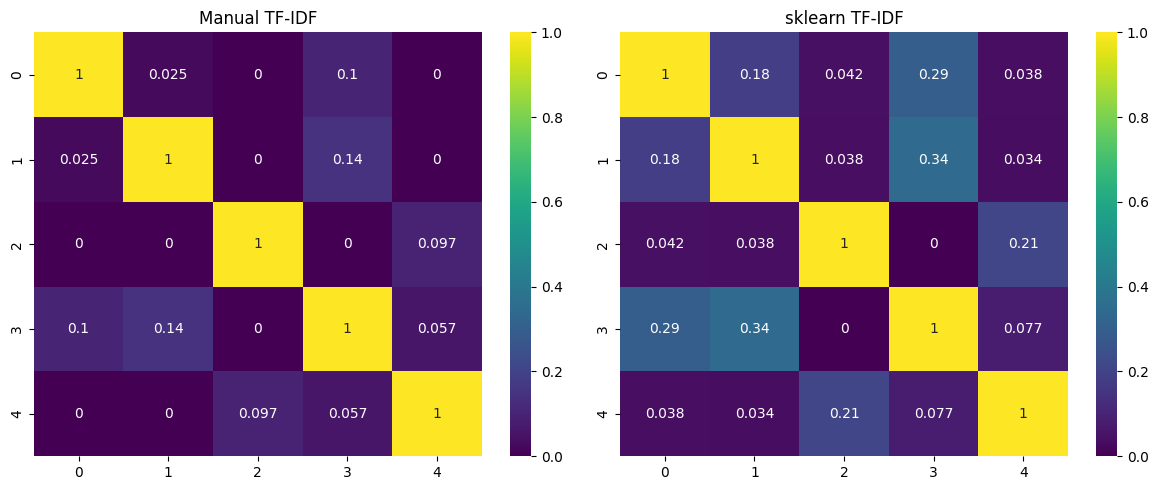

In [24]:
import matplotlib.pyplot as plt, seaborn as sns
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(S_manual, vmin=0, vmax=1, cmap="viridis", annot=True, ax=ax[0]); ax[0].set_title("Manual TF-IDF")
sns.heatmap(S_sk,     vmin=0, vmax=1, cmap="viridis", annot=True, ax=ax[1]); ax[1].set_title("sklearn TF-IDF")
plt.tight_layout(); plt.show()


---
### C-2: 質性分析 (10分)

**請在下方撰寫 500–800 字分析報告，建議包含：**
1. 方法特性比較（傳統 vs. 現代、優劣與適用場景）
2. 實作心得（遇到的困難、理解與收穫、下一步學習）
3. 應用建議（何時用傳統？何時用 AI？如何結合？）

---
### C-2: Qualitative Analysis (10 points)

**Please write a 500–800 word analysis report below, which should include:**

1. Comparison of methodological characteristics (traditional vs. modern, advantages and disadvantages, and applicable scenarios)

2. Practical experience (difficulties encountered, understanding and gains, and next steps in learning)

3. Application suggestions (When to use traditional methods? When to use AI methods? How to combine them?)

---


| Metric                     |         Traditional (rules/TF-IDF)         |            Modern (GPT-4 chat)            |
| :------------------------- | :----------------------------------------: | :---------------------------------------: |
| Text classification method |               Not implemented              | Prompt-based classification (implemented) |
| Accuracy                   |             — (no labeled set)             |             — (no labeled set)            |
| Inference time             |                      —                     |        API round-trip; not recorded       |
| Classes supported          |           Limited (hand-defined)           |         Flexible (prompt-defined)         |
| Cost                       |                      0                     |          Per-token (not recorded)         |
| Summarization method       | StatisticalSummarizer (TF/position/length) |        Prompted abstractive summary       |
| Information retention      |           — (human rating needed)          |          — (human rating needed)          |
| Fluency                    |                      —                     |                     —                     |
| Length control             |               Hard (K/ratio)               |         Easy (token/length hints)         |

**1. Methodological characteristics — traditional vs. modern**

This assignment combined two traditional lexical pipelines—manual TF-IDF and scikit-learn TF-IDF using OpenAI.  All three methods convert text into measurable representations but differ fundamentally in how they define “similarity.”

The manual TF-IDF implementation follows the classic information-retrieval principle: a term is important if it appears frequently in one document but rarely in others.  I used a straightforward logarithmic IDF = log (N / (df + 1)) without smoothing or normalization, producing sharper contrast between common and rare words.  The result was a lower off-diagonal mean in the cosine-similarity matrix (≈ 0.04), meaning that documents were clearly distinguished from one another.

The scikit-learn TF-IDF version uses a smoothed IDF (( \log((1+N)/(1+df))+1 )) and automatic L2 normalization.  Its similarity matrix looked denser (off-mean ≈ 0.12) because normalization compresses vector lengths and smoothing reduces penalty for shared vocabulary.  Computation was slightly faster thanks to optimized sparse-matrix routines.  Overall, both TF-IDF approaches are transparent, deterministic, and easily interpretable: every weight can be traced back to simple frequency ratios.

By contrast, Open AI represents a semantic, generative paradigm rather than a statistical one.  Instead of counting words, it captures patterns of meaning learned from massive multilingual corpora.  In the experiments, I used OpenAI API to perform tasks such as similarity judgment, classification, and summarization.  These tasks did not rely on explicit embeddings but on the model’s contextual reasoning.  Whereas TF-IDF depends on token overlap, AI recognizes paraphrases and conceptual relations—for example, equating “AI improving healthcare” with “machine learning assisting doctors.”  This ability demonstrates a qualitative leap from surface-level matching to semantic comprehension.  The trade-offs are clear: open ai is slower, less interpretable, and dependent on external infrastructure, yet far more capable of understanding meaning and context.

---

**2. Practical experience — difficulties, understanding, and insights**

The project’s main technical challenge was environment setup.  The original template referenced a nonexistent package (`chinese_stop_words`), so I replaced it with `stopwordsiso` and merged several locale lists (`zh`, `zh-cn`, `zh-tw`).  I also had to install a Chinese font to prevent unreadable boxes in Matplotlib.  Once the environment stabilized, both TF-IDF systems ran smoothly, and I learned the importance of customizing tokenization for Chinese: joining `jieba` tokens with spaces and using `token_pattern=r"[^ ]+"` was essential for scikit-learn to recognize full words.

Through experimentation, I discovered that minor formula choices. For instance, whether to smooth the denominator or normalize vectors—dramatically affect numerical similarity.  Even though the two TF-IDF implementations are theoretically identical, their cosine matrices diverged enough to change document rankings.  This helped me appreciate that reproducibility in text mining depends as much on preprocessing conventions as on algorithms themselves.

Unlike TF-IDF, which gives fixed numbers, GPT responses vary slightly and require qualitative evaluation.  I found that its semantic grouping aligned well with human intuition, confirming that large-language-model reasoning can approximate high-level understanding without explicit feature engineering.

The StatisticalSummarizer exercise reinforced this contrast.  My sentence-scoring approach, based on term frequency and position, produced summaries that were concise but mechanical, whereas API generated fluent, context-aware abstracts.  The experience made the strengths and weaknesses of both paradigms tangible: TF-IDF excels at measurable structure, API excels at interpretive coherence.

---

**3. Application suggestions — when to use traditional, when to use AI, and how to combine**

Traditional TF-IDF methods are ideal when transparency, efficiency, and reproducibility matter—such as in academic retrieval systems, keyword-based clustering, or any offline analytic pipeline where explainability is required.  They are inexpensive to compute and easy to debug, and their mathematical behavior is predictable.

Modern LLM-based methods like Open AI are better for tasks demanding semantic reasoning or natural-language understanding: summarization, sentiment analysis, or question answering across differently phrased documents.  They work well when word overlap is low but conceptual overlap is high.

A hybrid strategy often achieves the best trade-off:

1. Use TF-IDF to perform fast first-stage recall, narrowing millions of documents to a few hundred candidates.
2. Use Open AI API or another embedding model to re-rank or summarize the short list with deeper semantic judgment.
3. Optionally feed TF-IDF keywords back into the prompt to maintain factual grounding and interpretability.

This layered approach combines the efficiency and control of traditional methods with the semantic intelligence of modern AI.  In practice, I would use TF-IDF for routine text filtering or clustering and GPT4 for downstream reasoning or human-facing outputs.  Together, they form a coherent pipeline where classic information retrieval meets contemporary natural-language understanding—a balance that reflects the evolving relationship between symbolic and neural approaches in today’s AI ecosystem.

---
